### Titanic survival analysis and prediction

This script prepares the datset for Machine Learning applications on Titanic dataset with exploratory analysis. This is mostly going through the tutorial for myself. Various Machine Learning techniques are applied and best prediction method based on test dataset is applied on traning dataset. I went thorough several kernel submissions in Kaggle to 
learn about this project and python data analysis and ML skills in general. Particularly I followed the one from [xirlo](https://www.kaggle.com/xirlomachine/tutorial-predicting-survival-on-titanic) for this submission who followed from [Manav](https://www.kaggle.com/startupsci/titanic-data-science-solutions).  
Many thanks to both of them and others as well.  
Learned lot of new stuffs and lots of new stuff to learn! Happly Kaggle!

In [83]:
# Import python libraries

import pandas as pd                       # for data processing, file I/O
from pandas import Series, DataFrame      
import numpy as np                        # linear algebra
import matplotlib.pyplot as plt           # visualization
import seaborn as sns                     # visualization
%matplotlib inline

In [84]:
# Import Machine Learning libraries:

# machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [85]:
# Import dataset:

train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [86]:
# Combine both train and test datset for data engineering:

combine_df = [train_df, test_df]

In [87]:
# Preview dataset:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [88]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


FInd out about the categorical values:

In [90]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [91]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Rosenbaum, Miss. Edith Louise",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### Exploratory analysis

In [92]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [93]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [94]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [95]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Data visualization:

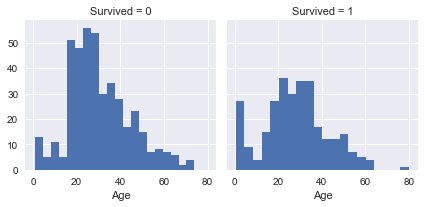

In [96]:
# use a facetgrid (FacetGrid is used to draw plots with multiple Axes 
# where each Axes shows the same relationship conditioned on different levels of some variable.
# It’s possible to condition on up to three variables by assigning variables 
# to the rows and columns of the grid and using different colors for the plot elements.)

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### Observations
* Young Children had a high survival rate (>20%)  
* Many 15-25 year olds did not survive.  
* Majority of passengers are in the 15-35 age range.  

Combining multiple categorical features with numerical feature 'Age' to see their correlations:  

Looking at both Age and Sex:

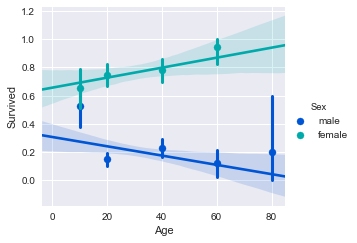

In [100]:
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue='Sex', data=train_df, palette='winter', x_bins=generations, size=3.5, aspect=1.2)

#### Observations  
Female survival is higher than male at all age. Older males have lower survival  while older females have higher survival.

Now, looking at passenger class and survival:

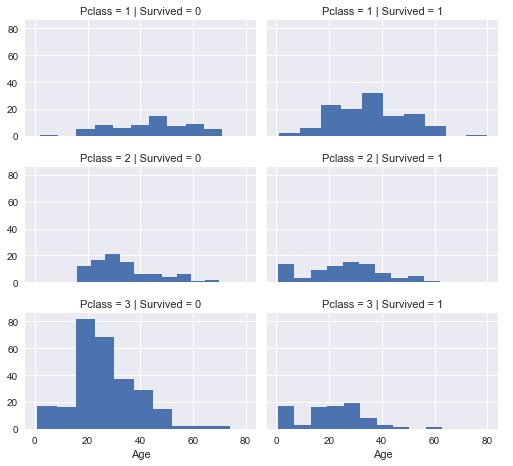

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6 )
grid.map(plt.hist, 'Age')
grid.add_legend()

#### Observations  
Pclass=3 had the most passengers but most of them did not survive. The youngest passengers (ie less than 5) in Pclass=2 and Pclass=3 mostly survived. Most passengers in Pclass=1 survived. Pclass varies in terms of Age distribution of passengers.
Based on these observations, Pclass is good to consider for model training

Looking at correlations of categorical features:

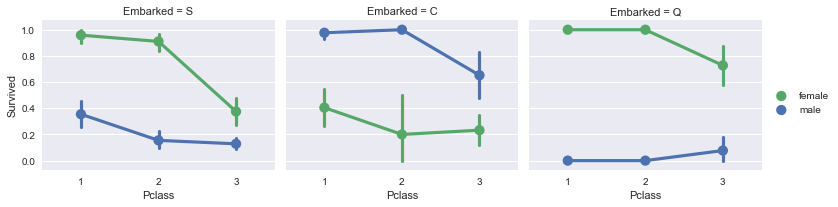

In [104]:
grid = sns.FacetGrid(train_df, col='Embarked', size=3, aspect=1.2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

#### Observations  
* PClass 1 and 2 generally had higher survival rates  
* Females in 2 of the 3 embarkment points had significantly higher survival rates than males. A similar pattern is observed for the other embarkment point for males (C)  
* Point of embarkment does have a varying effect on survival for males.  
* Based on this, Embarked and Sex will be added to model training. Embarked has 889 non null values so the remaining two will need to be completed.  

Correlating categorical with numerical features:

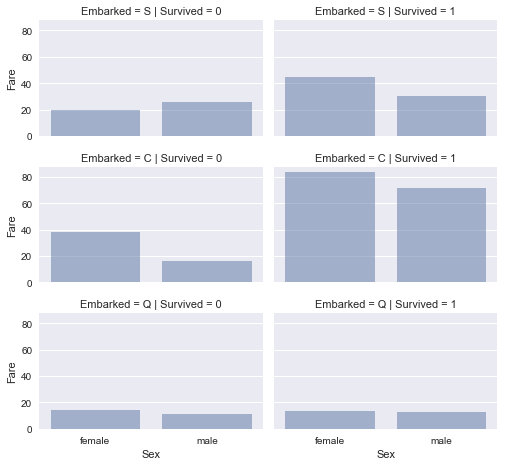

In [105]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived',size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()

#### Observations
* Embarkment point affects survival  
* Again, in general females have higher survival rate  
* Higher paying passengers had higher survival rate  

Moving forward, we can bin our Fare data in order to see more meaningful trends in different fare classes.

### Data wrangling

The tutorial suggests dropping Cabin and Ticket features.

In [106]:
print("Before", train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine_df = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine_df[0].shape, combine_df[1].shape)

('Before', (891, 12), (418, 11), (891, 12), (418, 11))
('After', (891, 10), (418, 9), (891, 10), (418, 9))


#### Creating a title column

The title of an individual could tell us about their age, socio-economic status, job etc. Based on the correlations we have seen above, there could be useful information here that is correlated with survival.

In [107]:
# iterate over both datasets in combine (train_df and test_df)
# and note that we also added the new field to both datasets

for dataset in combine_df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [108]:
for dataset in combine_df:
    # these titles are interesting, but very few numbers of them exist, hence 'Rare'
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
       'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Rare titles had an about average rate of survival Miss, Mrs, Master (children) had much higher rates of survival Mr had the poorest survival.  
To simplify this will be converted to ordinal values.

In [109]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine_df:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
   
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now that the useful information has been extracted from Name, it may be removed from both datasets. We will also remove PassengerID from the training dataset but keep it in testing dataset.

In [110]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine_df = [train_df, test_df]

train_df.shape, test_df.shape

((891, 9), (418, 9))

#### Convert catrgorical features to numbers:

Most models require numerical inputs rather than strings. Thus, the categorical features also should be represented numerically, as we did above with Title. Here the 'Sex' feature has been replaced with numerical representation of 1: female and 0: male

In [111]:
for dataset in combine_df:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


Filling the 'Age' column and grouping it few numbers:

Guess an age based on correlations with other feature. For example, a correlation between Gender and Pclass. Use the median age value for a given Gneder, Pclass.

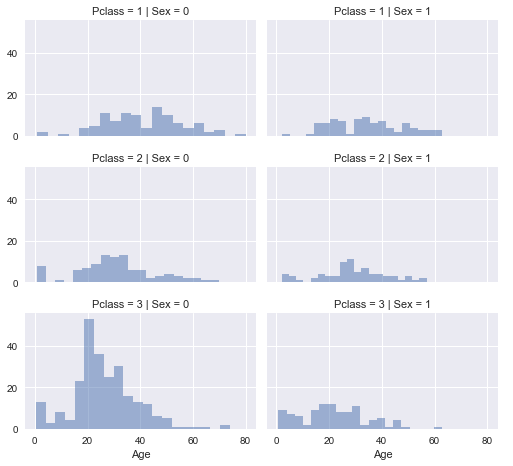

In [112]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

In [113]:
# Preallocate an array to store an age guess for each gender, Pclass combination

guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [114]:
for dataset in combine_df:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
           
            age_guess = guess_df.median()
            #print(age_guess)
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            #print(guess_ages)
            #print('-'*10)
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),
                        'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)   

train_df.head(20) 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1
5,0,3,0,25,0,0,8.4583,Q,1
6,0,1,0,54,0,0,51.8625,S,1
7,0,3,0,2,3,1,21.0750,S,4
8,1,3,1,27,0,2,11.1333,S,3
9,1,2,1,14,1,0,30.0708,C,3


In [115]:
# Grouping Age column:

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


Replace age with an ordinal value based on the age bands above

In [116]:
for dataset in combine_df:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[ (dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[ (dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[  dataset['Age'] > 64, 'Age'] = 4

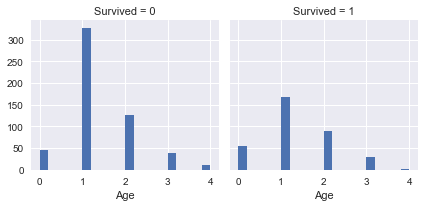

In [117]:
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Age', bins=20)

In [118]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine_df = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### FamilySize feature

In [119]:
for dataset in combine_df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Of the families on board, it seems like medium size families fared the best.
Going further along this same idea, we will create another feature called isAlone

In [120]:
for dataset in combine_df:
    dataset['isAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'isAlone'] = 1 #set isAlone to False if family 

train_df[['isAlone', 'Survived']].groupby(['isAlone'], as_index=False).mean()   

,isAlone,Survived
0,0,0.505650
1,1,0.303538


In [121]:
# Eliminate the Parch, SibSp and FamilySize features and focus on isAlone for further analysis.

train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

combine_df = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Another derived feature which may be useful is a combination of Age and Class.

In [122]:
for dataset in combine_df:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


Fill missing Embarked values and converting to numerical values:

In [123]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [124]:
# use freq_port in the the fillna function
for dataset in combine_df:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [125]:
for dataset in combine_df:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


Filling 'Fare' column and grouping it:

In [126]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [127]:
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


'qcut' ensures that each band has approximately the same number of values where cut separates the range of the data by the number of bins specified.

In [40]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [41]:
for dataset in combine_df:
    dataset.loc[ dataset['Fare'] <=7.91, 'Fare'] = 0
    dataset.loc[ (dataset['Fare'] > 7.91) & (dataset['Fare'] <=14.454), 'Fare' ] = 1
    dataset.loc[ (dataset['Fare'] > 14.454) & (dataset['Fare'] <=31), 'Fare' ] = 2
    dataset.loc[ (dataset['Fare'] > 31), 'Fare' ] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)


train_df = train_df.drop(['FareBand'], axis=1)

In [42]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [43]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


A quick plot of the heat map should reaffirm our feature selection:

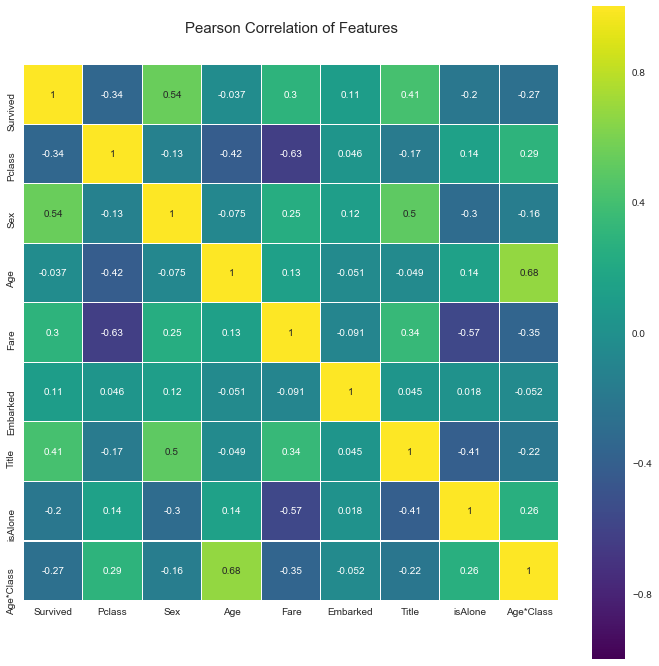

In [44]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Model prediction

1. Since we already know the results, this is a supervised learning problem  
2. We are trying to classify whether someone survived (1 or 0) based on input variables (regression)  


The suggested models for this case are:  
* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

Separate the Survived feature from our training data, as this is what we will try to predict and ensure that the training and test data contain the same features.

In [45]:
X_train = train_df.drop('Survived', axis=1) # independent variables only
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891L,), (418, 8))

#### Logistic regression:

Logistic Regression is used for cases where the dependent variable or outcome is categorical. In this case, this means that it can be represented by a binary outcome such as pass/fail, win/lose, or in this case, survived/not survived. Logistic regression measures the relationship between the dependent variable and one or more independent variables with estimated probabilities.

In [46]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.26

* Above, line 1 we instantiated a Logistic Regression class object
* line 2, trained the model on the training data
* line 3, tested it on the test data set (which only has the independent variables in it)
* line 4, use logreg.score to evaluate how well the model did Lets try and understand how it arrived at these values a bit better.

In [47]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,isAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


Sex is positively correlated with Survival (remember Female =1 and Male=0). Higher title values are also positively correlated. Pclass has the largest negative correlation with survival- ie as Pclass increases, survival decreases.

#### Support Vector Machines

SVMs are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other (Wikipedia). SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes. In the simple case, you can think of it as the green balls are on one side of the lawn, and the blue ones are on the other and you draw a lne to separate them. Now, expand to a higher dimensional space and realize that it is very unlikely that a straight line/plane would separate your data.

In [48]:
svc  = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5

#### k-Nearest Neighbours (k-NN)
This is a non parametric method used for classification and regression. The model would predict the value for the dependent variable that it is closest to its similar neighbours in the feature space.

In [75]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

Searching best k for nearest neighbors:

In [79]:
# Test k values 1 through 20
k_range = range(1, 21)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(round(knn.score(X_train, Y_train) * 100, 2))

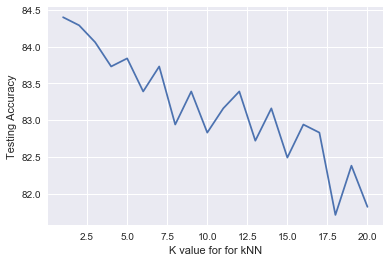

In [81]:
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

So, intial nearest neighbor value of 3 is about right. Larger value will  be worse.

#### Naive Bayes
Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Naive Bayes classifiers are highly scalable and well suited to large datasets.

In [55]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

#### Perceptron
Perceptron is a classification algorithm that makes its predictions based on a linear predictor function by combining a set of weights with the feature vector. (WIkipedia)

In [56]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.79

#### Linear SVC
Linear SVC is typically best for text classification problems. It is another implementation of Support Vector Classification for the case of a linear kernel. (more needed here!!)

In [57]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.46

#### Stochastic Gradient Descent
In SGD we iteratively update our weight parameters in the direction of the gradient of the loss function until we have reached a minimum. Unlike traditional gradient descent, we do not use the entire dataset to compute the gradient at each iteration. Instead, at each iteration we randomly select a single data point from our dataset and move in the direction of the gradient with respect to that data point (http://alexminnaar.com/deep-learning-basics-neural-networks-backpropagation-and-stochastic-gradient-descent.html)

In [58]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.84

#### Decision Tree
Decision tree learning uses a decision tree to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). (wikipedia).

In [59]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

#### Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. (WIkipedia)

In [61]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

Feature importance with random forest:

In [63]:
feature_importance = random_forest.feature_importances_

In [64]:
# make importances relative to max importance and sort:
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

In [70]:
sorted_idx

array([6, 2, 4, 7, 3, 0, 1, 5], dtype=int64)

In [71]:
pos

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

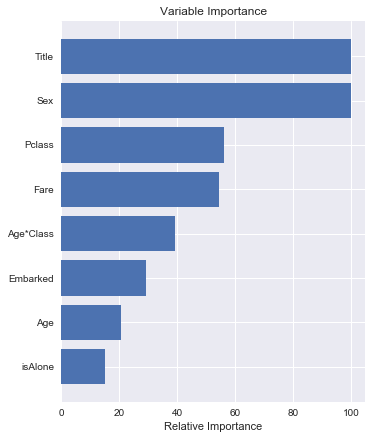

In [73]:
# Plot
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### Model Evaluation
Both decision tree and Random Forest gave the same score, but Random Forest is acknowledged as slightly better as decision trees have a tendency to overfit the training data set.

In [76]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'kNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,kNN,84.06
0,Support Vector Machines,83.50
2,Logistic Regression,81.26
7,Linear SVC,79.46
5,Perceptron,78.79
4,Naive Bayes,76.88
6,Stochastic Gradient Decent,72.84


#### Submit prediction:

In [78]:
results = Y_pred
results = pd.Series(results,name="Survived")
results=results.astype(int)
#test_df = pd.read_csv('../input/test.csv')
passengerid = test_df['PassengerId'].astype(int)
submission5 = pd.DataFrame({"PassengerId": test_df['PassengerId'], "Survived": results})
submission5.to_csv("submission5_random_forest.csv",index=False)
#from subprocess import check_output
#print(check_output(["ls", "."]).decode("utf8"))